In [1]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
        markers = ('o', 's', '^', 'v', '<')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
        lab = lab.reshape(xx1.shape)
        plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolors='black')
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx] 
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

In [4]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

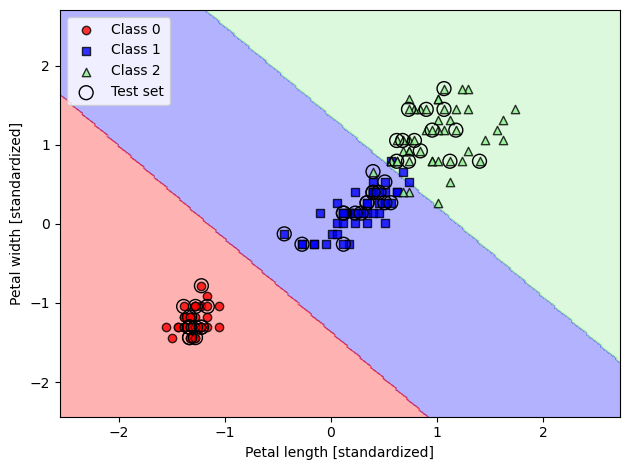

In [5]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)


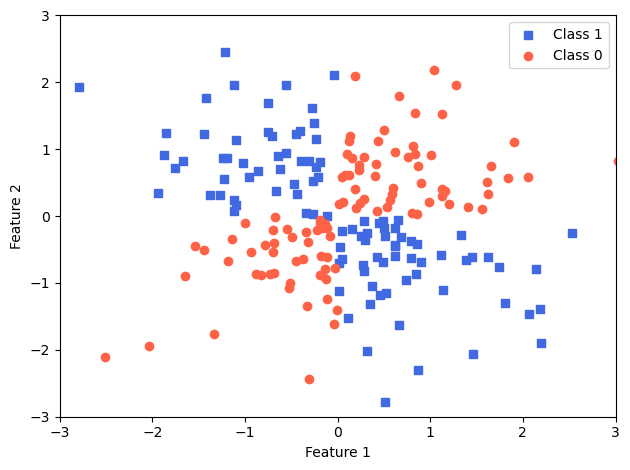

In [7]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
svm_kernel = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_kernel.fit(X_xor, y_xor)


SVC(C=10.0, gamma=0.1, random_state=1)

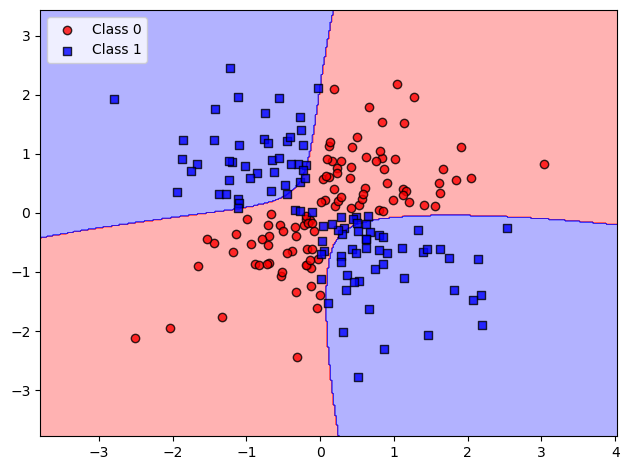

In [9]:
plot_decision_regions(X_xor, y_xor, classifier=svm_kernel)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)


SVC(gamma=0.2, random_state=1)

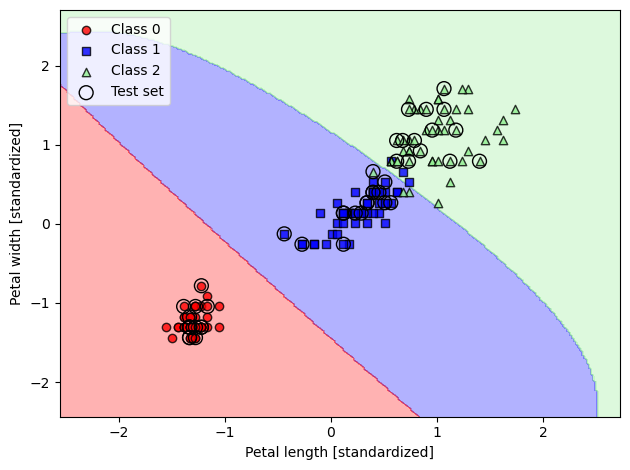

In [11]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)


SVC(gamma=100.0, random_state=1)

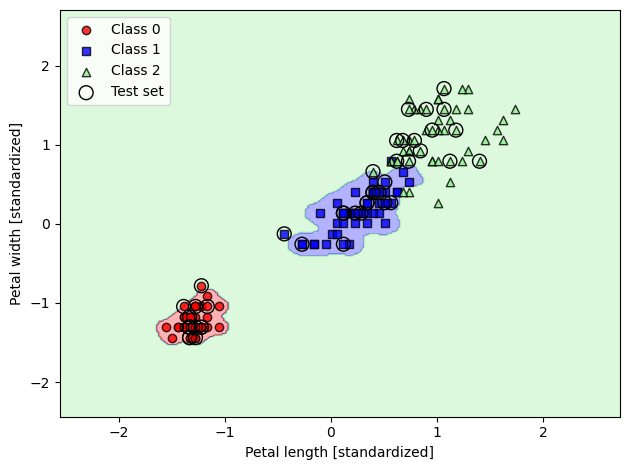

In [13]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()